In [24]:
import torch
print(torch.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

2.0.0


In [25]:
import os
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [26]:
print(torch.version.cuda)

11.8


In [27]:


# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

## Load data and create a dataset

In [28]:
train_path='data/mnist_train_small.csv'
train=pd.read_csv(train_path,header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_path='data/mnist_test.csv'
test=pd.read_csv(test_path,header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train = np.array(train).astype('float32')
test = np.array(test).astype('float32')

In [31]:
train.dtype

dtype('float32')

In [32]:
train[:,[0]]

array([[6.],
       [5.],
       [7.],
       ...,
       [2.],
       [9.],
       [5.]], dtype=float32)

### Define a dataset class

In [33]:
class MNISTdataset(Dataset):
    '''creates a MNIST like dataset from csv'''
    def __init__(self,array):
        xy=torch.from_numpy(array)
        self.x = xy[:,1:].reshape(-1,1,28,28)
        self.y=xy[:,0]
        self.n_samples = xy.shape[0]
    def __getitem__(self,index):
        digit=int(self.y[index])
        return self.x[index],digit
    def __len__(self):
        return self.n_samples

In [34]:
train_ds=MNISTdataset(train)

In [35]:
test_ds=MNISTdataset(test)

In [36]:
features,labels=train_ds[0]

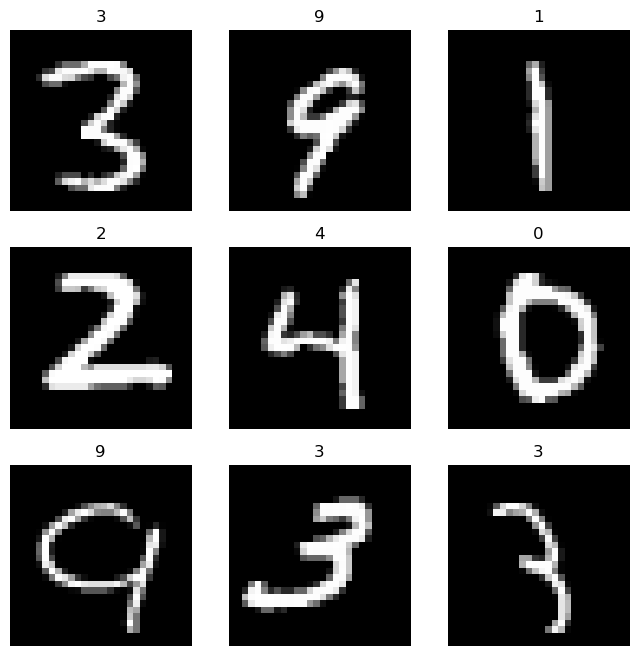

In [37]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_ds), size=(1,)).item()
    img, label = train_ds[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Set up data loaders

In [38]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_ds, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_ds,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000017913158160>, <torch.utils.data.dataloader.DataLoader object at 0x0000017913473250>)
Length of train dataloader: 625 batches of 32
Length of test dataloader: 313 batches of 32


In [39]:


# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


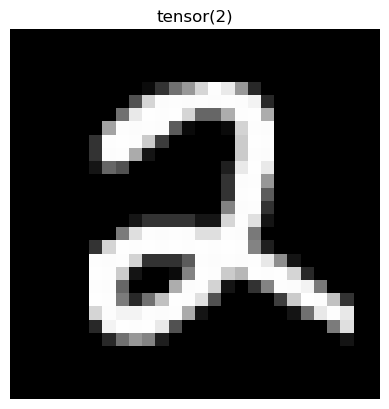

In [40]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label)
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

#create the model:

In [41]:
class Linear(nn.Module):

    def __init__(self):
        super().__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

In [42]:
hidden_units=10
input_shape=1
layer= nn.Conv2d(in_channels=input_shape, 
                      out_channels=10, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding='same') # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
layer2=nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding='same')

In [43]:
img, label = train_ds[sample_idx]

In [44]:
m = nn.Conv2d(3, 10, 5, 1, 'same')
input = torch.randn(20, 3, 50, 100)
output = m(input)
output.shape

torch.Size([20, 10, 50, 100])

In [45]:
img.shape

torch.Size([1, 28, 28])

In [46]:
output=layer(torch.unsqueeze(img,0))
output=layer2(output)
output=nn.MaxPool2d(kernel_size=2,
                         stride=2)(output)
output.shape

torch.Size([1, 10, 14, 14])

### Define a model class

In [50]:
class ConvNet(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding='same'), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.ReLU(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*14*14,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = ConvNet(input_shape=1, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=10).to(device)
model_0

ConvNet(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): ReLU()
    (2): Linear(in_features=1960, out_features=10, bias=True)
  )
)

In [58]:
input=torch.randn(20, 1, 51, 101)
input=input.to(device)
print(input.shape)
output=model_0.conv_block_1(input)
print(output.shape)

torch.Size([20, 1, 51, 101])
torch.Size([20, 10, 25, 50])


In [26]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [27]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [28]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [29]:
results=train(model_0,train_dataloader,test_dataloader,optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001),epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3636 | train_acc: 0.9139 | test_loss: 0.1151 | test_acc: 0.9654
Epoch: 2 | train_loss: 0.0898 | train_acc: 0.9725 | test_loss: 0.1024 | test_acc: 0.9688
Epoch: 3 | train_loss: 0.0597 | train_acc: 0.9803 | test_loss: 0.1506 | test_acc: 0.9587
Epoch: 4 | train_loss: 0.0468 | train_acc: 0.9848 | test_loss: 0.1242 | test_acc: 0.9686
Epoch: 5 | train_loss: 0.0340 | train_acc: 0.9888 | test_loss: 0.1144 | test_acc: 0.9716
Epoch: 6 | train_loss: 0.0311 | train_acc: 0.9892 | test_loss: 0.1561 | test_acc: 0.9670
Epoch: 7 | train_loss: 0.0381 | train_acc: 0.9879 | test_loss: 0.1239 | test_acc: 0.9706
Epoch: 8 | train_loss: 0.0223 | train_acc: 0.9926 | test_loss: 0.1308 | test_acc: 0.9728
Epoch: 9 | train_loss: 0.0259 | train_acc: 0.9919 | test_loss: 0.1771 | test_acc: 0.9629
Epoch: 10 | train_loss: 0.0269 | train_acc: 0.9919 | test_loss: 0.1752 | test_acc: 0.9700
Epoch: 11 | train_loss: 0.0234 | train_acc: 0.9926 | test_loss: 0.1684 | test_acc: 0.9704
Epoch: 12 | train_l

In [30]:
results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [31]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

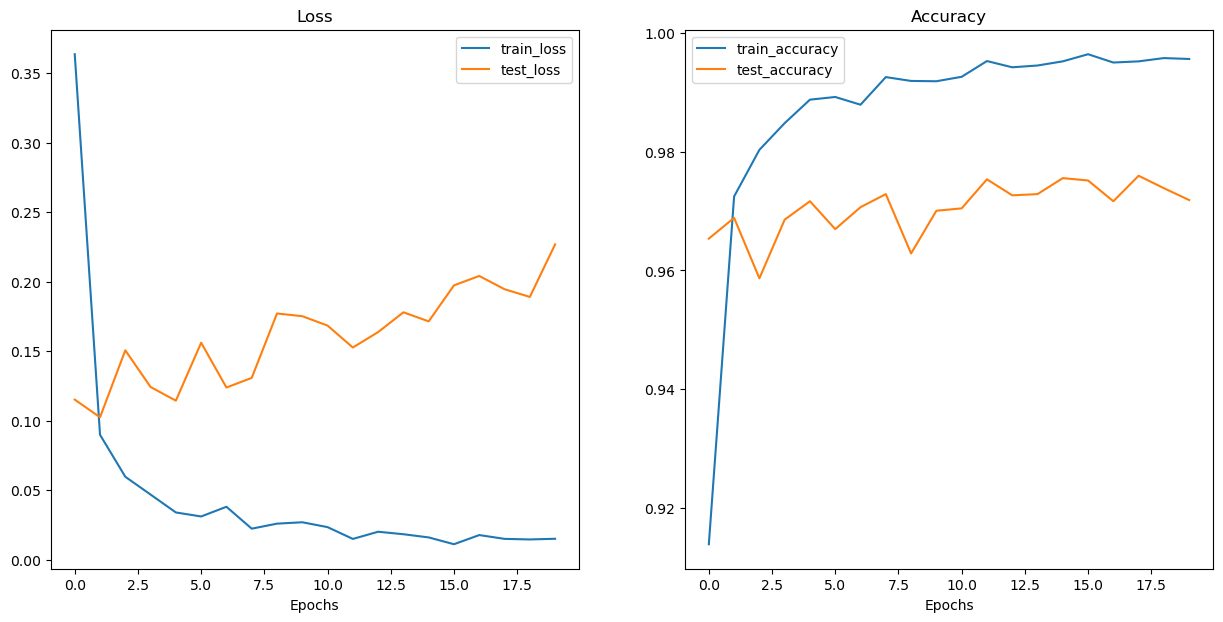

In [32]:
plot_loss_curves(results)

In [33]:
def pred_and_plot_digit(model: torch.nn.Module, 
                        index, 
                        class_names= None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = read_image(str(index)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

NameError: name 'List' is not defined

In [ ]:
def plot_predict(model: torch.nn.Module):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(train_ds), size=(1,)).item()
        img, label = train_ds[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()